# This is the testing document to find the prediction model


Import the libraries and data:

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
# data
data_path = '../C964_housing_cost_estimator/data/melb_data.csv'
realty_data = pd.read_csv(data_path)
realty_data.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Clean missing values:

In [2]:
realty_data = realty_data.dropna(axis=0)
print('realty data head: \n',(realty_data.head())['Price'])

realty data head: 
 1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


ANALYSIS: Select the target to predict and features: 

In [3]:
# tartget prediction:
y = realty_data.Price
# features:
realty_data_features = ['Rooms', 'Distance', 'BuildingArea', 'Car']
X = realty_data[realty_data_features]
X.describe()

,Rooms,Distance,BuildingArea,Car
count,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,9.751097,141.568645,1.573596
std,0.971079,5.612065,90.834824,0.929947
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,5.900000,91.000000,1.000000
50%,3.000000,9.000000,124.000000,1.000000
75%,4.000000,12.400000,170.000000,2.000000
max,8.000000,47.400000,3112.000000,10.000000


In [4]:
# looking at the top 5 values
X.head()

,Rooms,Distance,BuildingArea,Car
1,2,2.5,79.0,0.0
2,3,2.5,150.0,0.0
4,4,2.5,142.0,2.0
6,3,2.5,210.0,0.0
7,2,2.5,107.0,2.0


### Building the Decision Tree Regression model using SciKit Learn

Define: I will be using a Regression Supervised learning algorithm from SciKit Learn that will make a decision tree that I can use to predict the cost of a house.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# define model
realty_price_model = DecisionTreeRegressor(random_state=1)
# fit the model
realty_price_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Now we will predict some values:

In [6]:
predict_vals = X.head()

prediction = realty_price_model.predict(predict_vals)

print('values are: ', predict_vals)
print('prediction is ', prediction)

values are:     Rooms  Distance  BuildingArea  Car
1      2       2.5          79.0  0.0
2      3       2.5         150.0  0.0
4      4       2.5         142.0  2.0
6      3       2.5         210.0  0.0
7      2       2.5         107.0  2.0
prediction is  [1035000. 1465000. 1600000. 1876000. 1636000.]


As you can see the prediction works but this is with the same data it trained with so we need to test it with test data to see if it really works.

## Testing with test data: Attempt 1

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# split data randomly into two sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# define model
realty_price_model_testing = DecisionTreeRegressor()
# fit model
realty_price_model_testing.fit(train_X, train_y)

# now we are predicting on foriegn data to see if it really works
val_predictions = realty_price_model_testing.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


359844.245319561


### It was off! 

It was off by alot! the mean value error is around 300,000 so there is something we need to fix.

I am going to try converting string categorical data to integers so that it can be used to train the data, then we hopefully will have a better prediction.

#### Converting categorical data to integers using get_dummies()

Indexes in the values are:

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
       

old features are: realty_data_features = ['Rooms', 'Distance', 'BuildingArea', 'Car']

ADD Bedroom2, Bathroom to the feature list!!!! fixme 

I want to change to dummy variables: 'Type', 'Method' 

In [8]:
# converting columns to dummies
type_dummy = pd.get_dummies(realty_data.Type, columns=['Type'], prefix='type')
# method_dummy = pd.get_dummies(realty_data.Method, columns=['Method'], prefix='method')
# region_name_dummy = pd.get_dummies(realty_data.Regionname, columns=['Regionname'], prefix='regionname')

# print(type_dummy)
# print(method_dummy)
# print(region_name_dummy)

# assigning new values
realty_data = pd.concat([realty_data, type_dummy], axis = 1)
print(realty_data.head())


# columns_to_add = ['regionname_Eastern Metropolitan',  'regionname_Eastern Victoria', 'regionname_Northern Metropolitan',  
#  'regionname_Northern Victoria',  'regionname_South-Eastern Metropolitan', 'regionname_Southern Metropolitan',  
#  'regionname_Western Metropolitan','regionname_Western Victoria']









       Suburb          Address  Rooms Type      Price Method SellerG  \
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
4  Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
6  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

        Date  Distance  Postcode  ...  BuildingArea  YearBuilt  CouncilArea  \
1  4/02/2016       2.5    3067.0  ...          79.0     1900.0        Yarra   
2  4/03/2017       2.5    3067.0  ...         150.0     1900.0        Yarra   
4  4/06/2016       2.5    3067.0  ...         142.0     2014.0        Yarra   
6  7/05/2016       2.5    3067.0  ...         210.0     1910.0        Yarra   
7  8/10/2016       2.5    3067.0  ...         107.0     1890.0        Yarra   

   Lattitude  Longtitude             Regionname Propertycount  type_h  type_t  \
1   -37.807

### Now lets remove outliers, Visualization 1:

In [9]:
import matplotlib.pyplot
import seaborn as sns

<AxesSubplot:xlabel='Price'>

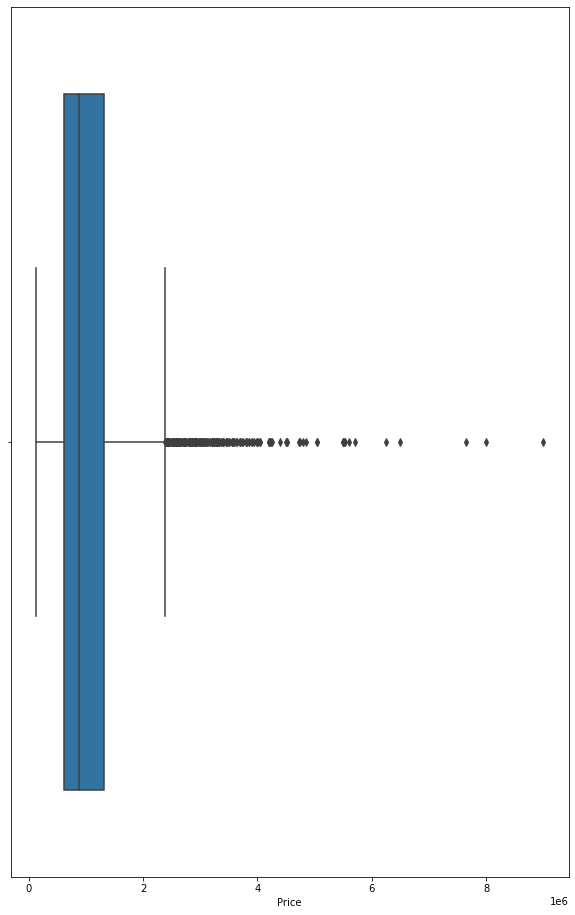

In [10]:
plt.figure(figsize=(10,16))
sns.boxplot(data=realty_data, x='Price')
# here we can see there are alot of outlires

<AxesSubplot:xlabel='Price'>

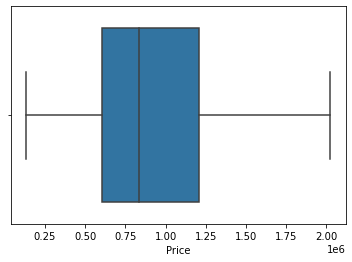

In [11]:
# now to remove them, anything over 3 standard deviations is considered an outlier
realty_data = realty_data[realty_data['Price']<realty_data['Price'].std()*3]
sns.boxplot(data=realty_data, x='Price')

It worked! Outlires are gone!

## Now lets update Features now that we have dummy rows

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

old features are: realty_data_features = ['Rooms', 'Distance', 'BuildingArea', 'Car']

ADD Bedroom2, Bathroom to the feature list!!!! fixme

I want to change to dummy variables: 'Type', 'Method'

In [12]:
realty_data_features_2 = ['Rooms', 'Distance', 'BuildingArea', 
                          'Bedroom2', 'Bathroom', 'Landsize', 
                         'Lattitude', 'Longtitude', 'type_h', 
                          'type_t', 'type_u' ]


# tartget prediction:
y = realty_data.Price

X = realty_data[realty_data_features_2]

# make model and test set

# split data randomly into two sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# define model
realty_price_model_testing = DecisionTreeRegressor()
# fit model
realty_price_model_testing.fit(train_X, train_y)

# now we are predicting on foriegn data to see if it really works
val_predictions = realty_price_model_testing.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


172164.76013986013


# We reduced the inaccuracy from 362,839 to 117,402!!!

This is big headway. I did this by removing outlires, creating binary indexes for catagories, and changing the features. 

Now im going to try a different model using the Random Forest Regressor and see if that can improve the accuracy.

## Trying Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

# split data randomly into two sets

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# define model
realty_price_model_testing = RandomForestRegressor()
# fit model
realty_price_model_testing.fit(train_X, train_y)

# now we are predicting on foriegn data to see if it really works
val_predictions = realty_price_model_testing.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
print(explained_variance_score(val_y, val_predictions, multioutput='uniform_average'))
print('\n prediction values: ', realty_data.head())

127421.49550815849
0.8214333971693795

 prediction values:         Suburb          Address  Rooms Type      Price Method SellerG  \
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
4  Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
6  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

        Date  Distance  Postcode  ...  BuildingArea  YearBuilt  CouncilArea  \
1  4/02/2016       2.5    3067.0  ...          79.0     1900.0        Yarra   
2  4/03/2017       2.5    3067.0  ...         150.0     1900.0        Yarra   
4  4/06/2016       2.5    3067.0  ...         142.0     2014.0        Yarra   
6  7/05/2016       2.5    3067.0  ...         210.0     1910.0        Yarra   
7  8/10/2016       2.5    3067.0  ...         107.0     1890.0        Yarra   

   Lattitude  Longtitude        

### WOW! 

#### We reduced the inaccuracy from 117,402 to 88,374!!!

## Model fits accuracy measure

The explained variance score of this model is .76. This is very accurate and probably beats my goal of 75% accuracy. Now I can start coding the website.

# Now we need to make Exportable values for the website

In [14]:
realty_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'type_h', 'type_t',
       'type_u'],
      dtype='object')

In [15]:
# The new datafile without outliers:

# The features
realty_data_features_2 = ['Rooms', 'Distance', 'BuildingArea',
                          'Bedroom2', 'Landsize', 
                         'Lattitude', 'Longtitude', 'type_h',
                          'type_t', 'type_u', 'method_PI', 'method_S',
                          'method_SA', 'method_SP', 'method_VB']


# print(realty_data.head())
X.describe()



,Rooms,Distance,BuildingArea,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,type_h,type_t,type_u
count,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000
mean,2.839482,9.888005,131.136451,2.812904,1.499038,452.781081,-37.805122,144.987009,0.633328,0.103689,0.262983
std,0.925584,5.747463,73.337552,0.924560,0.633084,923.834817,0.077126,0.101362,0.481938,0.304884,0.440292
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-38.164920,144.542370,0.000000,0.000000,0.000000
25%,2.000000,6.000000,88.000000,2.000000,1.000000,138.000000,-37.854000,144.921580,0.000000,0.000000,0.000000
50%,3.000000,9.200000,119.000000,3.000000,1.000000,337.000000,-37.797000,144.991400,1.000000,0.000000,0.000000
75%,3.000000,12.800000,158.000000,3.000000,2.000000,607.000000,-37.754250,145.050450,1.000000,0.000000,1.000000
max,8.000000,47.400000,1561.000000,9.000000,8.000000,37000.000000,-37.457090,145.526350,1.000000,1.000000,1.000000


# Now lets look at some more analysis of the regression. Visualization 2: 

Text(0, 0.5, 'Frequency')

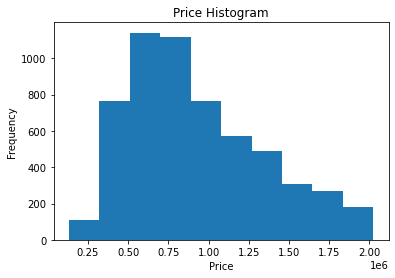

In [16]:
# make a histogram of the price data
fig, ax = plt.subplots()

ax.hist(realty_data['Price'])
ax.set_xlabel('Price')
ax.set_title('Price Histogram')
ax.set_ylabel('Frequency')

# Visualization 3: scatterplot with house size vs price


Text(0, 0.5, 'Price')

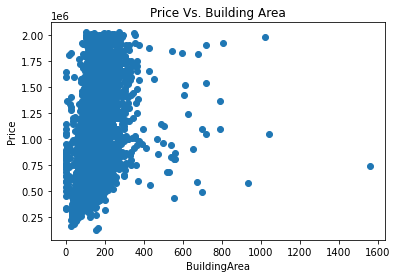

In [17]:
fig, ax = plt.subplots()

ax.scatter(realty_data['BuildingArea'],realty_data['Price'])
ax.set_xlabel('BuildingArea')
ax.set_title('Price Vs. Building Area')
ax.set_ylabel('Price')

In [23]:
newall = realty_data_features + ['Price'] + ['type_h',
                          'type_t', 'type_u']
realty_data.head()[newall]

,Rooms,Distance,BuildingArea,Car,Price,type_h,type_t,type_u
1,2,2.5,79.0,0.0,1035000.0,1,0,0
2,3,2.5,150.0,0.0,1465000.0,1,0,0
4,4,2.5,142.0,2.0,1600000.0,1,0,0
6,3,2.5,210.0,0.0,1876000.0,1,0,0
7,2,2.5,107.0,2.0,1636000.0,1,0,0
